## Question 2(d)
(i). Visualize the data-set.

(ii). After the necessary data preparation, make a linear regression model to predict the target variable.

• Briefly explain the following losses : RMSE, MSE, MAE.

• Write a function from scratch to find any one of these loss functions.

• Also check the value of this loss using sklearn library.

• Report the accuracy and R2
score of your model for both training and test data

##**(i) Data visualization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat',names =["Freqency(in Hertz)", "Angle of attack (in deg)", "Length of chord (in meters)", "Free stream velocity ( in meter/sec)", "Suction side displacement thickness (in meters)", "Scaled sound pressure level (in dB)"])
df #As the data didn't have column names I have added while loading the data

,Freqency(in Hertz),Angle of attack (in deg),Length of chord (in meters),Free stream velocity ( in meter/sec),Suction side displacement thickness (in meters),Scaled sound pressure level (in dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


## **(ii) data preparation, make a linear regression model to predict the target variable.**

preparing input and output data 

In [ ]:
# taking all the features by excluding type column 
x=df.drop(['Scaled sound pressure level (in dB)'], axis=1)#features
y=df['Scaled sound pressure level (in dB)']

display input data

In [ ]:
x

,Freqency(in Hertz),Angle of attack (in deg),Length of chord (in meters),Free stream velocity ( in meter/sec),Suction side displacement thickness (in meters)
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


display output data

In [ ]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1498    110.264
1499    109.254
1500    106.604
1501    106.224
1502    104.204
Name: Scaled sound pressure level (in dB), Length: 1503, dtype: float64

splitting the data into training data and testing data by using sklearn library I have taken test set to be 30% of the rows of data x and y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_test #displaying input test data

,Freqency(in Hertz),Angle of attack (in deg),Length of chord (in meters),Free stream velocity ( in meter/sec),Suction side displacement thickness (in meters)
1356,1250,6.7,0.1016,55.5,0.005214
51,400,0.0,0.3048,31.7,0.003313
738,800,0.0,0.0508,55.5,0.000762
408,315,7.3,0.2286,55.5,0.011171
1072,1000,9.5,0.0254,55.5,0.004328
...,...,...,...,...,...
1353,630,6.7,0.1016,55.5,0.005214
330,315,4.0,0.2286,39.6,0.004738
1070,630,9.5,0.0254,55.5,0.004328
1201,800,17.4,0.0254,31.7,0.017663


In [ ]:
y_test #displaying output data

1356    136.883
51      125.045
738     124.336
408     136.284
1072    130.332
         ...   
1353    133.023
330     122.229
1070    125.452
1201    139.226
979     134.563
Name: Scaled sound pressure level (in dB), Length: 451, dtype: float64

Making the linear regression model

In [ ]:
linear_regression_model= LinearRegression()
linear_regression_model = linear_regression_model.fit(x_train,y_train)#this command fits the linear model for the data we used to train the model

In [ ]:
y_predict = linear_regression_model.predict(x_test) # finding the predicted values from the model by giving test inputs

plot of actual and predicted outputs after applying test data to the model

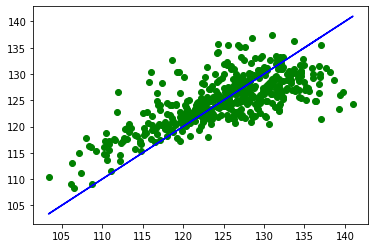

In [ ]:
plt.scatter(y_test,y_predict,c="g")
plt.plot(y_test,y_test,c="blue")
plt.show()

**Calculating RMSE, MSE, MAE**

### **RMSE** : Heuristically RMSE can be thought of normolaised distance between the actual vector and predicted vector.

### **MSE** : The average square of the discrepancy between the estimated and actual values.

### **MAE** : The magnitude of the discrepancy between an observation's true value and its prediction is referred to as the absolute error.

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
RMSE = np.sqrt(mean_squared_error(y_test,y_predict)) # Using the inbuilt functions to calucate the errors from sklearn library
MSE = mean_squared_error(y_test,y_predict)
R2_SCORE = r2_score(y_test,y_predict)
MAE =  mean_absolute_error(y_test,y_predict)

print("metrics calculated on the data are:\n")
print("RMSE(Root Mean sqaure Error) is :",RMSE)
print("MSE(Root Mean sqaure Error) is :",MSE)
print("R2_SCORE is :",MAE)
print("MSE(Mean Absolute Error) is :",MAE)

metrics calculated on the data are:

RMSE(Root Mean sqaure Error) is : 4.852882148013258
MSE(Root Mean sqaure Error) is : 23.550465142505768
R2_SCORE is : 3.7680313995213948
MSE(Mean Absolute Error) is : 3.7680313995213948


Writing a function to find mean square error from scratch and checkig the correctness using inbuilt function


In [ ]:
import statistics
def root_mean_square_loss(lst1,lst2): # function to find RMSE
# lst1= y_test and lst2= y_predicted values
  diff = lst1-lst2
  sqr = abs(diff)**2
  mse = statistics.mean(sqr) # first found mean square error 
  rmse = np.sqrt(mse) # then taken square root of it
  return rmse
mse_from_scratch = root_mean_square_loss(y_test,y_predict)
print("root_mean_square_loss calculated using function from scractch",mse_from_scratch)
rmse_using_inbuilt = np.sqrt(mean_squared_error(y_test,y_predict)) # checking that with inbuilt function
print("root_mean_square_loss calculated using sklearn library function",rmse_using_inbuilt)

root_mean_square_loss calculated using function from scractch 4.852882148013258
root_mean_square_loss calculated using sklearn library function 4.852882148013258


**Calculating Accuracy**

In [ ]:
#y_predict= linear_regression_model.predict(x_test)
Accuracy = 100- metrics.mean_absolute_percentage_error(y_test,y_predict)
print("Accuracy of data which is predicted using linear regression model is",Accuracy)

# from sklearn.metrics import accuracy_score
# score = accuracy_score(y_test,y_predict)
# score

Accuracy of data which is predicted using linear regression model is 99.96983042944977


**R2 score for training and testing data**

R2 score is used to find the performance of the model if it's value is 1 then the model is perfect if the value is zero that means the performance of model is bad

In [ ]:
#R2 score of training data
y_predict_train = linear_regression_model.predict(x_train)
r2_train= r2_score(y_train,y_predict_train) # the obtained r2 score of 
print("R2 score of training dataset:",r2_train)

R2 score of training dataset: 0.5094132333173876


In [ ]:
y_predict_train = linear_regression_model.predict(x_test)
r2_test= r2_score(y_test,y_predict)
print("R2 score of test dataset is ",r2_test) #the obtained r2 score of test data is 0.52 

R2 score of test dataset is  0.5204536183918511
